In [1]:
from google.colab import drive
import pandas as pd
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define the exact path based on your screenshot
# Path: My Drive -> midterm -> midterm-regresi-dataset.csv
file_path = '/content/drive/MyDrive/midterm/midterm-regresi-dataset.csv'

print(f"Loading data from: {file_path}")

# 3. Load the dataset (header=None because the first row is data, not names)
df = pd.read_csv(file_path, header=None)

# Rename the first column to 'Year' (Target) as per instructions
df.rename(columns={0: 'Year'}, inplace=True)

print("SUCCESS: Data Loaded!")
print(f"Shape: {df.shape} (Rows, Columns)")
print(df.head())

Mounted at /content/drive
Loading data from: /content/drive/MyDrive/midterm/midterm-regresi-dataset.csv
SUCCESS: Data Loaded!
Shape: (515345, 91) (Rows, Columns)
   Year         1         2         3         4         5         6         7  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

          8         9  ...        81         82        83        84        85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ... 

Preprocessing...
Data reduced to 51534 rows for speed.
Training Random Forest (Fast)...
Random Forest RMSE: 9.6339
Training Neural Network (Fast)...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-870819390.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE Error', data=results_df, palette='viridis')


Neural Network RMSE: 66.1765

Generating Chart...


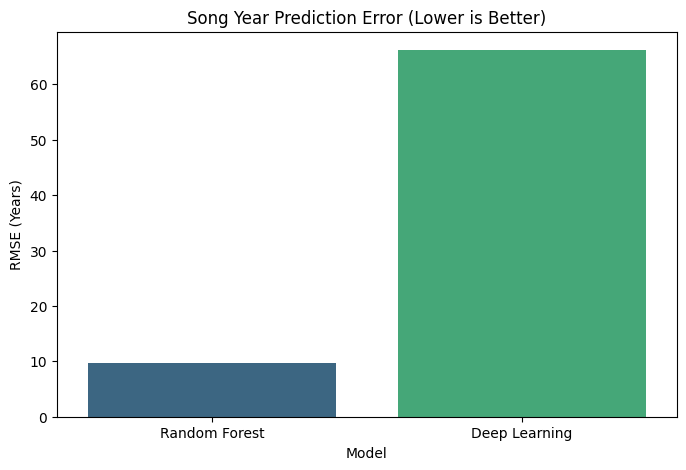

Task 2 FINISHED.


In [5]:
# --- FIXED EMERGENCY SPEED MODE ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# 1. Preprocessing & SAMPLING
print("Preprocessing...")
# TAKE ONLY 10% of data to make it run instantly
df_small = df.sample(frac=0.1, random_state=42)
print(f"Data reduced to {df_small.shape[0]} rows for speed.")

X = df_small.drop(columns=['Year'])
y = df_small['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Traditional ML (Random Forest)
print("Training Random Forest (Fast)...")
rf = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

rf_preds = rf.predict(X_test)
# FIX: Calculate RMSE manually using np.sqrt
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

# 3. Deep Learning (Neural Network)
print("Training Neural Network (Fast)...")
dl = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', max_iter=100, random_state=42)
dl.fit(X_train, y_train)

dl_preds = dl.predict(X_test)
# FIX: Calculate RMSE manually using np.sqrt
dl_rmse = np.sqrt(mean_squared_error(y_test, dl_preds))
print(f"Neural Network RMSE: {dl_rmse:.4f}")

# 4. Plot
print("\nGenerating Chart...")
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Deep Learning'],
    'RMSE Error': [rf_rmse, dl_rmse]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE Error', data=results_df, palette='viridis')
plt.title('Song Year Prediction Error (Lower is Better)')
plt.ylabel('RMSE (Years)')
plt.show()
-
print("Task 2 FINISHED.")